In [1]:
import os
import pandas as pd
import numpy as np
import math
import cmath
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [2]:
df = pd.read_csv("../../data/cleaned_jetblue_df.csv")

df.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,a291a2b5ac19223c3407cfec58d1fc24,2022-04-16,2022-04-17,ATL,CLT,VH0AUEL1,PT8H48M,0,False,False,...,1650216180||1650238380,2022-04-17T13:23:00.000-04:00||2022-04-17T19:3...,BOS||CLT,ATL||BOS,JetBlue Airways||JetBlue Airways,B6||B6,||Embraer 190,9480||8880,947||728,coach||coach
1,d53bcf9e8b6523fa2de9420d7cb22196,2022-04-16,2022-04-17,ATL,DTW,RH0AUEL1,PT5H8M,0,False,False,...,1650244380||1650254280,2022-04-17T21:13:00.000-04:00||2022-04-17T23:5...,JFK||DTW,ATL||JFK,JetBlue Airways||JetBlue Airways,B6||B6,Embraer 190||Embraer 190,8580||7680,762||485,coach||coach
2,5bb138f39804320ece767e747608a50e,2022-04-16,2022-04-17,ATL,EWR,VC0QBEL1,PT2H9M,0,False,False,...,1650202740,2022-04-17T09:39:00.000-04:00,EWR,ATL,JetBlue Airways,B6,Embraer 190,7740,762,coach
3,8201f75d221c7aa5b78f3b7781166032,2022-04-16,2022-04-17,ATL,JFK,RC0ABEL1,PT2H15M,0,False,False,...,1650208500,2022-04-17T11:15:00.000-04:00,JFK,ATL,JetBlue Airways,B6,Airbus A320,8100,762,coach
4,a63591f2b4df39d809c4a45a3898e122,2022-04-16,2022-04-17,ATL,JFK,RC0ABEL1,PT2H23M,0,False,False,...,1650244380,2022-04-17T21:13:00.000-04:00,JFK,ATL,JetBlue Airways,B6,Embraer 190,8580,762,coach


In [3]:
sorted(df.columns)

['baseFare',
 'destinationAirport',
 'elapsedDays',
 'fareBasisCode',
 'flightDate',
 'isBasicEconomy',
 'isNonStop',
 'isRefundable',
 'legId',
 'searchDate',
 'seatsRemaining',
 'segmentsAirlineCode',
 'segmentsAirlineName',
 'segmentsArrivalAirportCode',
 'segmentsArrivalTimeEpochSeconds',
 'segmentsArrivalTimeRaw',
 'segmentsCabinCode',
 'segmentsDepartureAirportCode',
 'segmentsDepartureTimeEpochSeconds',
 'segmentsDepartureTimeRaw',
 'segmentsDistance',
 'segmentsDurationInSeconds',
 'segmentsEquipmentDescription',
 'startingAirport',
 'totalFare',
 'totalTravelDistance',
 'travelDuration']

# Route Searches in DF

In [4]:
["startingAirport", "destinationAirport"]

['startingAirport', 'destinationAirport']

In [5]:
## Groups the routes by start, destination, and count of the pairing. 
num_of_distinct_routes_df = df.groupby(["startingAirport", "destinationAirport"]).size().reset_index(name="count")

## Sorts out the information
sorted_distinct_route_df = num_of_distinct_routes_df.sort_values(by="count", ascending=False)



## Feature engineering unique plotting label
sorted_distinct_route_df["Route"] = sorted_distinct_route_df["startingAirport"] + "-" + sorted_distinct_route_df["destinationAirport"]

sorted_distinct_route_df["bar_color"] = [x for x in sorted_distinct_route_df["Route"] if sorted_distinct_route_df["Route"].str.contain("JFK"):  else]

sorted_distinct_route_df

,startingAirport,destinationAirport,count,Route
93,JFK,LAX,144944,JFK-LAX
103,LAX,JFK,135097,LAX-JFK
117,LGA,ORD,129404,LGA-ORD
121,MIA,BOS,129401,MIA-BOS
99,LAX,BOS,125326,LAX-BOS
...,...,...,...,...
48,DEN,ORD,301,DEN-ORD
29,CLT,DFW,21,CLT-DFW
59,DFW,OAK,18,DFW-OAK
133,OAK,DFW,16,OAK-DFW


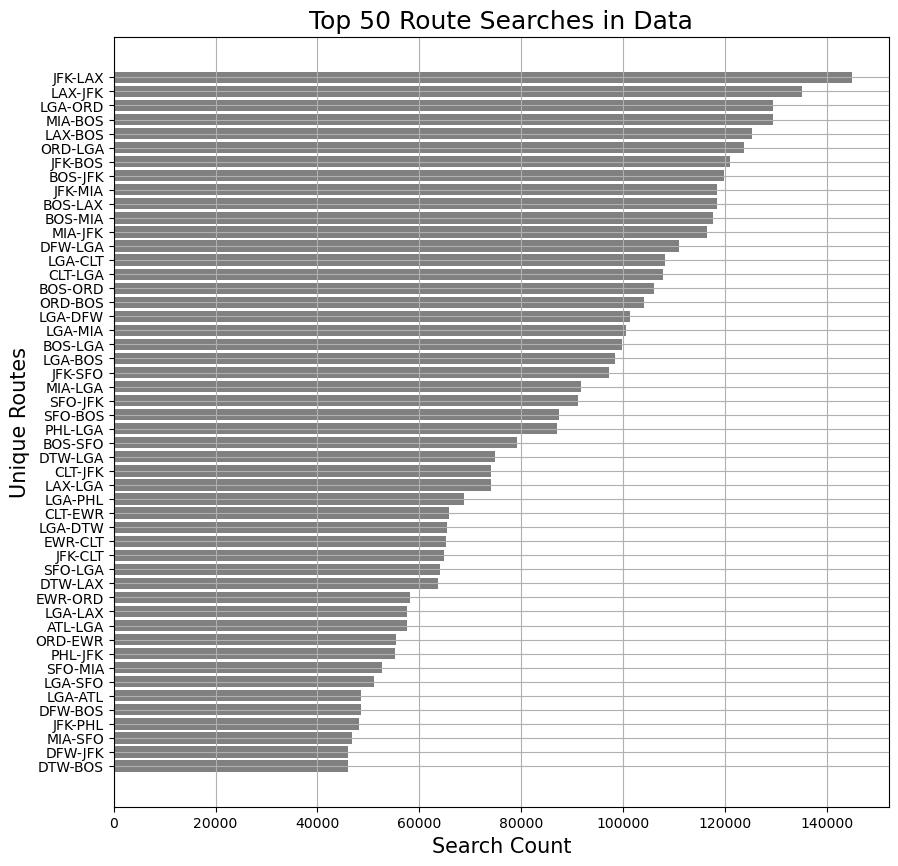

In [6]:
plt.figure(figsize=(10,10))

plt.gca().invert_yaxis()
plt.barh(sorted_distinct_route_df["Route"].head(50), sorted_distinct_route_df["count"].head(50), color="gray")

plt.title("Top 50 Route Searches in Data", size=18)
plt.ylabel("Unique Routes", size=15)
plt.xlabel("Search Count", size=15)
plt.grid(which="major")

# plt.show();

The data seems to have a heavy bias towards specific airports. This may fluctuate our model slightly.  

In [7]:
sorted(df.columns)

['baseFare',
 'destinationAirport',
 'elapsedDays',
 'fareBasisCode',
 'flightDate',
 'isBasicEconomy',
 'isNonStop',
 'isRefundable',
 'legId',
 'searchDate',
 'seatsRemaining',
 'segmentsAirlineCode',
 'segmentsAirlineName',
 'segmentsArrivalAirportCode',
 'segmentsArrivalTimeEpochSeconds',
 'segmentsArrivalTimeRaw',
 'segmentsCabinCode',
 'segmentsDepartureAirportCode',
 'segmentsDepartureTimeEpochSeconds',
 'segmentsDepartureTimeRaw',
 'segmentsDistance',
 'segmentsDurationInSeconds',
 'segmentsEquipmentDescription',
 'startingAirport',
 'totalFare',
 'totalTravelDistance',
 'travelDuration']

**How many times does JFK pop up?**

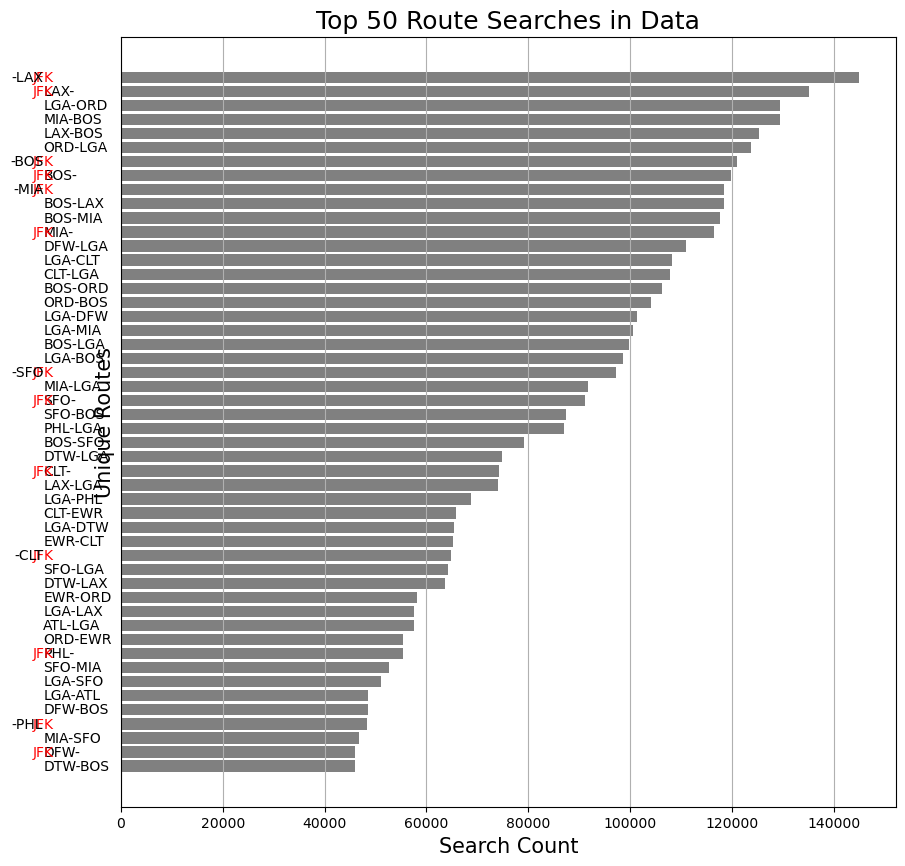

In [49]:
plt.figure(figsize=(10,10))

routes = sorted_distinct_route_df["Route"].head(50)
counts = sorted_distinct_route_df["count"].head(50)

plt.gca().invert_yaxis()
plt.barh(routes, counts, color="gray")

plt.title("Top 50 Route Searches in Data", size=18)
plt.ylabel("Unique Routes", size=15)
plt.xlabel("Search Count", size=15)
plt.grid(which="major")

# Removes the auto y tick labels
plt.yticks([])



# This solution is interesting, but not exactly what I need. 
ax = plt.gca()
for i, route in enumerate(routes):

    y_pos = i
    # count = counts.iloc[i]

    #Check if JFK in route
    if "JFK" in route:

        #Split route into parts
        before, jfk, after = route.partition("JFK")

        #Notation for `before` and `after` in black, `JFK` in red
        plt.text(-0.1, y_pos, before, va="center", ha="left", color="black", fontsize=10, transform=ax.get_yaxis_transform())
        plt.text(-0.1, y_pos, jfk, va="center", ha="center", color="red", fontsize=10, transform=ax.get_yaxis_transform())
        plt.text(-0.1, y_pos, after, va="center", ha="right", color="black", fontsize=10, transform=ax.get_yaxis_transform())
    else:
        plt.text(-0.1, y_pos, route, va="center", color="black", fontsize=10, transform=ax.get_yaxis_transform())

plt.show();

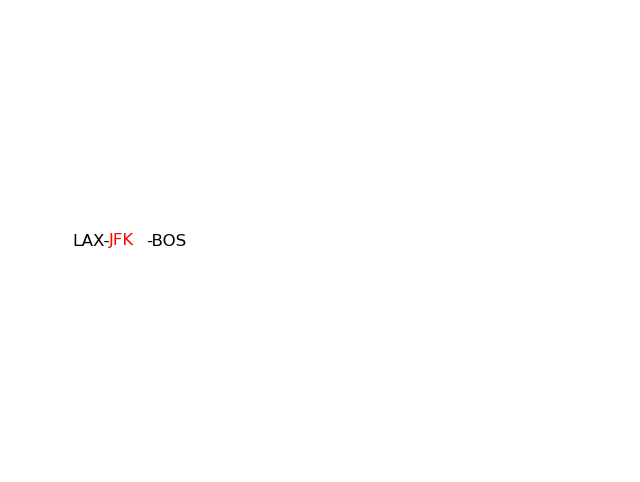

In [44]:
import matplotlib.pyplot as plt

# Example route string
route = "LAX-JFK-BOS"

# Partition the route around 'JFK'
before, middle, after = route.partition("JFK")

# Create the plot
plt.figure(figsize=(8, 6))

# Set the y-position (just a simple example; this could be dynamically set)
y_pos = 0.5

# Define an initial x position
x_pos = 0.1  # Start near the left of the plot

# Plot the 'before' part in black
plt.text(x_pos, y_pos, before, va='center', ha='left', color='black', fontsize=12)

# Adjust the x position for the 'middle' (JFK) part
x_pos += len(before) * 0.015  # Adjust spacing dynamically based on length of 'before'

# Plot the 'middle' (JFK) part in red
plt.text(x_pos, y_pos, middle, va='center', ha='left', color='red', fontsize=12)

# Adjust the x position for the 'after' part
x_pos += len(middle) * 0.02  # Adjust spacing dynamically based on length of 'middle'

# Plot the 'after' part in black
plt.text(x_pos, y_pos, after, va='center', ha='left', color='black', fontsize=12)

# Final plot setup
plt.xlim(0, 1)  # Set x-axis limits
plt.ylim(0, 1)  # Set y-axis limits
plt.axis('off')  # Turn off axis lines and labels

# Show the plot
plt.show()


In [11]:

##This is cool for displaying how the annotatiions will work
for i, route in enumerate(routes):
    count = counts.iloc[i]

    #Check if JFK in route
    if "JFK" in route:
        #Split route into parts
        before, jfk, after = route.partition("JFK")
        print("------")
        print({count}, {i}, {before}, {jfk}, {after})
        

# plt.show();

------
{144944} {0} {''} {'JFK'} {'-LAX'}
------
{135097} {1} {'LAX-'} {'JFK'} {''}
------
{121036} {6} {''} {'JFK'} {'-BOS'}
------
{119818} {7} {'BOS-'} {'JFK'} {''}
------
{118523} {8} {''} {'JFK'} {'-MIA'}
------
{116494} {11} {'MIA-'} {'JFK'} {''}
------
{97162} {21} {''} {'JFK'} {'-SFO'}
------
{91216} {23} {'SFO-'} {'JFK'} {''}
------
{74169} {28} {'CLT-'} {'JFK'} {''}
------
{64883} {34} {''} {'JFK'} {'-CLT'}
------
{55318} {41} {'PHL-'} {'JFK'} {''}
------
{48248} {46} {''} {'JFK'} {'-PHL'}
------
{46016} {48} {'DFW-'} {'JFK'} {''}
